# EDA and Insights from Retail Data

# Objective: Perform EDA to find out how many customers are actually Satisfied with the Products and services provided by a Retail Company

In [1]:
# Importing necessary libraries
import os
import numpy as np # mathematical operations
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data

In [2]:
# Reading the data
dirty_data = pd.read_csv('dirty_data.csv')
dirty_data.head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD182494,ID6197211592,22/06/2019,Thompson,"[('Lucent 330S', 1), ('Thunder line', 2), ('iS...",12200.0,79.89,-37.815105,144.932843,10,11059.89,Winter,True,1.2800,perfect phone and trusted seller. phone itself...,True
1,ORD395518,ID0282825849,29/12/2019,Thompson,"[('Thunder line', 1), ('Universe Note', 2)]",9080.0,62.71,-37.802736,144.951118,0,9142.71,Summer,False,1.1621,it keeps dropping calls the wifi don't work th...,False
2,ORD494479,ID0579391891,02/03/2019,Nickolson,"[('Thunder line', 1), ('pearTV', 2)]",10670.0,65.87,-37.821302,144.957581,10,9668.87,Autumn,False,1.0949,five stars this is a great cheap phone.,True
3,ORD019224,ID4544561904,12/01/2019,Nickolson,"[('Universe Note', 1), ('Alcon 10', 2), ('Oliv...",24800.0,57.61,-37.811416,144.973073,15,21137.61,Summer,False,0.8571,charger did not fit the charger didn't fit.,False
4,ORD104032,ID6231506320,28/11/2019,Nickolson,"[('Universe Note', 1), ('Olivia x460', 1), ('i...",9145.0,75.54,37.823859,144.969892,25,6934.29,Spring,False,0.5867,four stars good,True


# Get the decription of the data

In [3]:
# get the statistical description of the data
dirty_data.describe()

,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,distance_to_nearest_warehouse
count,498.000000,496.000000,500.000000,500.000000,500.000000,500.000000
mean,25585.387550,76.679819,-35.835234,144.969494,10.890000,2.204224
std,86501.420493,14.529621,12.045393,0.022720,8.649134,8.812416
min,585.000000,46.350000,-37.827123,144.924967,0.000000,0.107800
25%,7050.000000,65.892500,-37.818222,144.953488,5.000000,0.751425
50%,12865.000000,76.335000,-37.812165,144.965357,10.000000,1.030100
75%,20360.000000,82.817500,-37.805364,144.983985,15.000000,1.408625
max,947691.000000,114.040000,37.826339,145.019837,25.000000,94.973400


In [4]:
# Get the shape of the data
print(f'Shape of dirty_data is: {dirty_data.shape}')

Shape of dirty_data is: (500, 16)


# Check Null Values

In [5]:
# Check for null values
print(dirty_data.isnull().sum())

order_id                         0
customer_id                      0
date                             0
nearest_warehouse                0
shopping_cart                    0
order_price                      2
delivery_charges                 4
customer_lat                     0
customer_long                    0
coupon_discount                  0
order_total                      0
season                           0
is_expedited_delivery            0
distance_to_nearest_warehouse    0
latest_customer_review           0
is_happy_customer                4
dtype: int64


# Box Plot

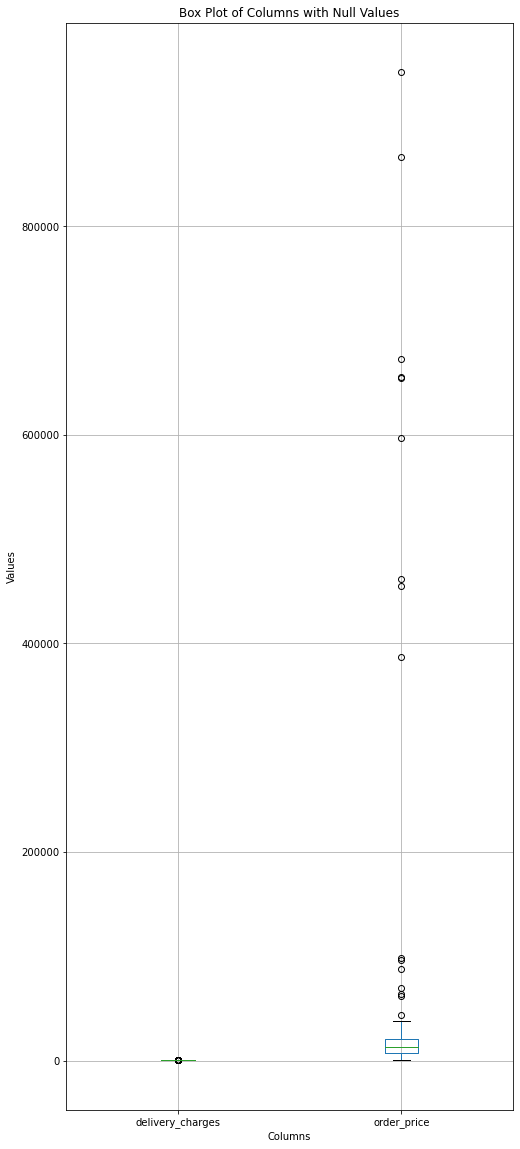

In [6]:
# Plot box plot for columns with missing values
plt.figure(figsize=(8,20))
dirty_data.boxplot(column=['delivery_charges','order_price'])
plt.title('Box Plot of Columns with Null Values')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

# Cases of Replacing values with Mean, Median and Mode

In [7]:
# Replacing the null values with mean
dirty_data['delivery_charges'].fillna(dirty_data['delivery_charges'].mean(), inplace=True)

In [8]:
# Replacing the null values with median
dirty_data['order_price'].fillna(dirty_data['order_price'].median(), inplace=True)

In [9]:
# Replacing the null values with mode
dirty_data['is_happy_customer'].fillna(dirty_data['is_happy_customer'].mode()[0], inplace=True)

In [10]:
dirty_data['is_happy_customer'].mode()

0    True
Name: is_happy_customer, dtype: bool

In [11]:
# Check for null values
print(dirty_data.isnull().sum())

order_id                         0
customer_id                      0
date                             0
nearest_warehouse                0
shopping_cart                    0
order_price                      0
delivery_charges                 0
customer_lat                     0
customer_long                    0
coupon_discount                  0
order_total                      0
season                           0
is_expedited_delivery            0
distance_to_nearest_warehouse    0
latest_customer_review           0
is_happy_customer                0
dtype: int64


In [12]:
# Check for data types of each column
print(dirty_data.dtypes)

order_id                          object
customer_id                       object
date                              object
nearest_warehouse                 object
shopping_cart                     object
order_price                      float64
delivery_charges                 float64
customer_lat                     float64
customer_long                    float64
coupon_discount                    int64
order_total                       object
season                            object
is_expedited_delivery               bool
distance_to_nearest_warehouse    float64
latest_customer_review            object
is_happy_customer                   bool
dtype: object


In [13]:
dirty_data

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD182494,ID6197211592,22/06/2019,Thompson,"[('Lucent 330S', 1), ('Thunder line', 2), ('iS...",12200.0,79.89,-37.815105,144.932843,10,11059.89,Winter,True,1.2800,perfect phone and trusted seller. phone itself...,True
1,ORD395518,ID0282825849,29/12/2019,Thompson,"[('Thunder line', 1), ('Universe Note', 2)]",9080.0,62.71,-37.802736,144.951118,0,9142.71,Summer,False,1.1621,it keeps dropping calls the wifi don't work th...,False
2,ORD494479,ID0579391891,02/03/2019,Nickolson,"[('Thunder line', 1), ('pearTV', 2)]",10670.0,65.87,-37.821302,144.957581,10,9668.87,Autumn,False,1.0949,five stars this is a great cheap phone.,True
3,ORD019224,ID4544561904,12/01/2019,Nickolson,"[('Universe Note', 1), ('Alcon 10', 2), ('Oliv...",24800.0,57.61,-37.811416,144.973073,15,21137.61,Summer,False,0.8571,charger did not fit the charger didn't fit.,False
4,ORD104032,ID6231506320,28/11/2019,Nickolson,"[('Universe Note', 1), ('Olivia x460', 1), ('i...",9145.0,75.54,37.823859,144.969892,25,6934.29,Spring,False,0.5867,four stars good,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,ORD475510,ID0247417082,07/08/2019,Nickolson,"[('Alcon 10', 2), ('iAssist Line', 2)]",386776.0,59.70,-37.817662,144.970405,10,20174.7,Winter,True,0.1282,i bought this phone to send to my sister in .....,False
496,ORD086060,ID0130015098,03-28-2019,Nickolson,"[('pearTV', 2), ('Candle Inferno', 2), ('Toshi...",22120.0,62.29,-37.815469,144.968083,0,22182.29,Autumn,True,0.3711,one star it was the wrong phone,False
497,ORD079320,ID2707985442,16/10/2019,Nickolson,"[('pearTV', 1), ('Alcon 10', 1), ('Lucent 330S...",16490.0,106.98,-37.805979,144.966101,0,16596.98,Spring,True,1.4368,love this phone! has many great features!,True
498,ORD026546,ID0060088412,19/05/2019,Nickolson,"[('iStream', 1), ('Candle Inferno', 1), ('iAss...",5030.0,79.89,37.820071,144.984435,10,4606.89,Autumn,True,1.3191,spoiled son's birthday present son wanted one ...,True


# Datatype conversion

In [14]:
# Convert the column into appropriate data type
dirty_data.date = pd.to_datetime(dirty_data['date'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_9716\2744717495.py:2: UserWarning: Parsing '22/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dirty_data.date = pd.to_datetime(dirty_data['date'])
C:\Users\DELL\AppData\Local\Temp\ipykernel_9716\2744717495.py:2: UserWarning: Parsing '29/12/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dirty_data.date = pd.to_datetime(dirty_data['date'])
C:\Users\DELL\AppData\Local\Temp\ipykernel_9716\2744717495.py:2: UserWarning: Parsing '28/11/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dirty_data.date = pd.to_datetime(dirty_data['date'])
C:\Users\DELL\AppData\Local\Temp\ipykernel_9716\2744717495.py:2: UserWarning: Parsing '16/09/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dirty_data.date = pd.to_datetime(dirty_da

In [15]:
# Check for the changed datatype
print(dirty_data.date.dtypes)

datetime64[ns]


In [16]:
# Check if it shows with each columns
print(dirty_data.dtypes)

order_id                                 object
customer_id                              object
date                             datetime64[ns]
nearest_warehouse                        object
shopping_cart                            object
order_price                             float64
delivery_charges                        float64
customer_lat                            float64
customer_long                           float64
coupon_discount                           int64
order_total                              object
season                                   object
is_expedited_delivery                      bool
distance_to_nearest_warehouse           float64
latest_customer_review                   object
is_happy_customer                          bool
dtype: object


# Sanity Check of the data

In [17]:
# Check for unique data
if dirty_data.order_id.is_unique:
    print("Data in order_id is unique")      # execute when 'if' block will true
else:
    print("Data in order_id is not unique")  # execute when 'else' block will true

Data in order_id is unique


In [18]:
# Check for unique values in a column
dirty_data['nearest_warehouse'].unique()

array(['Thompson', 'Nickolson', 'Bakers', 'nickolson', 'thompson',
       'Thompson911', '1211Bakers', 'Nick123olson'], dtype=object)

# Using Regular Expression to clean the data

In [19]:
# Find the values in the column with incorrect values
# Define a regular expression pattern to match numbers
pattern = '\d+' #Matches one or more digit
masked = dirty_data['nearest_warehouse'].str.contains(pattern, regex = True)
result = dirty_data[masked]
result

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
426,ORD057375,ID0710001161,2019-03-02,Thompson911,"[('Thunder line', 1), ('Alcon 10', 1), ('Candl...",18460.0,93.52,-37.813736,144.936811,25,665085.66,Summer,True,0.9098,best buy i've made on digico functions properl...,True
467,ORD144784,ID0333901582,2019-09-11,1211Bakers,"[('Olivia x460', 2), ('Lucent 330S', 2)]",4910.0,108.87,-37.801844,144.981358,25,3791.37,Autumn,True,1.5207,turned our old tv into a smart tv. really easy...,True
494,ORD379700,ID2190564628,2019-05-08,Nick123olson,"[('Candle Inferno', 1), ('Alcon 10', 1), ('Luc...",17510.0,75.37,-37.816209,144.964057,5,16709.87,Winter,True,0.5513,"good quality price ratio bought it for my mom,...",True


In [20]:
# Replacing the numbers in the string with nothing
dirty_data['nearest_warehouse'] = dirty_data['nearest_warehouse'].str.replace('\d+', '')
dirty_data

C:\Users\DELL\AppData\Local\Temp\ipykernel_9716\778973155.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  dirty_data['nearest_warehouse'] = dirty_data['nearest_warehouse'].str.replace('\d+', '')


,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD182494,ID6197211592,2019-06-22,Thompson,"[('Lucent 330S', 1), ('Thunder line', 2), ('iS...",12200.0,79.89,-37.815105,144.932843,10,11059.89,Winter,True,1.2800,perfect phone and trusted seller. phone itself...,True
1,ORD395518,ID0282825849,2019-12-29,Thompson,"[('Thunder line', 1), ('Universe Note', 2)]",9080.0,62.71,-37.802736,144.951118,0,9142.71,Summer,False,1.1621,it keeps dropping calls the wifi don't work th...,False
2,ORD494479,ID0579391891,2019-02-03,Nickolson,"[('Thunder line', 1), ('pearTV', 2)]",10670.0,65.87,-37.821302,144.957581,10,9668.87,Autumn,False,1.0949,five stars this is a great cheap phone.,True
3,ORD019224,ID4544561904,2019-12-01,Nickolson,"[('Universe Note', 1), ('Alcon 10', 2), ('Oliv...",24800.0,57.61,-37.811416,144.973073,15,21137.61,Summer,False,0.8571,charger did not fit the charger didn't fit.,False
4,ORD104032,ID6231506320,2019-11-28,Nickolson,"[('Universe Note', 1), ('Olivia x460', 1), ('i...",9145.0,75.54,37.823859,144.969892,25,6934.29,Spring,False,0.5867,four stars good,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,ORD475510,ID0247417082,2019-07-08,Nickolson,"[('Alcon 10', 2), ('iAssist Line', 2)]",386776.0,59.70,-37.817662,144.970405,10,20174.7,Winter,True,0.1282,i bought this phone to send to my sister in .....,False
496,ORD086060,ID0130015098,2019-03-28,Nickolson,"[('pearTV', 2), ('Candle Inferno', 2), ('Toshi...",22120.0,62.29,-37.815469,144.968083,0,22182.29,Autumn,True,0.3711,one star it was the wrong phone,False
497,ORD079320,ID2707985442,2019-10-16,Nickolson,"[('pearTV', 1), ('Alcon 10', 1), ('Lucent 330S...",16490.0,106.98,-37.805979,144.966101,0,16596.98,Spring,True,1.4368,love this phone! has many great features!,True
498,ORD026546,ID0060088412,2019-05-19,Nickolson,"[('iStream', 1), ('Candle Inferno', 1), ('iAss...",5030.0,79.89,37.820071,144.984435,10,4606.89,Autumn,True,1.3191,spoiled son's birthday present son wanted one ...,True


In [21]:
# Let's check if we still have incorrect values in the column
# Define a regular expression pattern to match numbers
pattern = '\d+' #Matches one or more digit
masked = dirty_data['nearest_warehouse'].str.contains(pattern, regex = True)
result = dirty_data[masked]
result

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer


# Find out the rows having the impure data

In [22]:
# Find the values in the column with incorrect values
# Define a regular expression pattern to match numbers
pattern = '[a-zA-Z\W]' #Matches one or more digit
mask = dirty_data['order_total'].str.contains(pattern, regex = True)
results = dirty_data[mask]
results

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD182494,ID6197211592,2019-06-22,Thompson,"[('Lucent 330S', 1), ('Thunder line', 2), ('iS...",12200.0,79.89,-37.815105,144.932843,10,11059.89,Winter,True,1.2800,perfect phone and trusted seller. phone itself...,True
1,ORD395518,ID0282825849,2019-12-29,Thompson,"[('Thunder line', 1), ('Universe Note', 2)]",9080.0,62.71,-37.802736,144.951118,0,9142.71,Summer,False,1.1621,it keeps dropping calls the wifi don't work th...,False
2,ORD494479,ID0579391891,2019-02-03,Nickolson,"[('Thunder line', 1), ('pearTV', 2)]",10670.0,65.87,-37.821302,144.957581,10,9668.87,Autumn,False,1.0949,five stars this is a great cheap phone.,True
3,ORD019224,ID4544561904,2019-12-01,Nickolson,"[('Universe Note', 1), ('Alcon 10', 2), ('Oliv...",24800.0,57.61,-37.811416,144.973073,15,21137.61,Summer,False,0.8571,charger did not fit the charger didn't fit.,False
4,ORD104032,ID6231506320,2019-11-28,Nickolson,"[('Universe Note', 1), ('Olivia x460', 1), ('i...",9145.0,75.54,37.823859,144.969892,25,6934.29,Spring,False,0.5867,four stars good,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,ORD475510,ID0247417082,2019-07-08,Nickolson,"[('Alcon 10', 2), ('iAssist Line', 2)]",386776.0,59.70,-37.817662,144.970405,10,20174.7,Winter,True,0.1282,i bought this phone to send to my sister in .....,False
496,ORD086060,ID0130015098,2019-03-28,Nickolson,"[('pearTV', 2), ('Candle Inferno', 2), ('Toshi...",22120.0,62.29,-37.815469,144.968083,0,22182.29,Autumn,True,0.3711,one star it was the wrong phone,False
497,ORD079320,ID2707985442,2019-10-16,Nickolson,"[('pearTV', 1), ('Alcon 10', 1), ('Lucent 330S...",16490.0,106.98,-37.805979,144.966101,0,16596.98,Spring,True,1.4368,love this phone! has many great features!,True
498,ORD026546,ID0060088412,2019-05-19,Nickolson,"[('iStream', 1), ('Candle Inferno', 1), ('iAss...",5030.0,79.89,37.820071,144.984435,10,4606.89,Autumn,True,1.3191,spoiled son's birthday present son wanted one ...,True


In [23]:
# How to replace anything from a string which is alphabet or special character
# dirty_data['order_total'] = dirty_data['order_total'].str.replace('[a-zA-Z\W]', '')
dirty_data['order_total'] = dirty_data['order_total'].str.replace('[^0-9.]', '')

C:\Users\DELL\AppData\Local\Temp\ipykernel_9716\3244829520.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  dirty_data['order_total'] = dirty_data['order_total'].str.replace('[^0-9.]', '')


In [24]:
dirty_data['order_total'] = dirty_data['order_total'].astype('float64')

In [25]:
dirty_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       500 non-null    object        
 1   customer_id                    500 non-null    object        
 2   date                           500 non-null    datetime64[ns]
 3   nearest_warehouse              500 non-null    object        
 4   shopping_cart                  500 non-null    object        
 5   order_price                    500 non-null    float64       
 6   delivery_charges               500 non-null    float64       
 7   customer_lat                   500 non-null    float64       
 8   customer_long                  500 non-null    float64       
 9   coupon_discount                500 non-null    int64         
 10  order_total                    500 non-null    float64       
 11  season             

In [26]:
sum(dirty_data.order_total)

19606261.840000015

In [27]:
dirty_data

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD182494,ID6197211592,2019-06-22,Thompson,"[('Lucent 330S', 1), ('Thunder line', 2), ('iS...",12200.0,79.89,-37.815105,144.932843,10,11059.89,Winter,True,1.2800,perfect phone and trusted seller. phone itself...,True
1,ORD395518,ID0282825849,2019-12-29,Thompson,"[('Thunder line', 1), ('Universe Note', 2)]",9080.0,62.71,-37.802736,144.951118,0,9142.71,Summer,False,1.1621,it keeps dropping calls the wifi don't work th...,False
2,ORD494479,ID0579391891,2019-02-03,Nickolson,"[('Thunder line', 1), ('pearTV', 2)]",10670.0,65.87,-37.821302,144.957581,10,9668.87,Autumn,False,1.0949,five stars this is a great cheap phone.,True
3,ORD019224,ID4544561904,2019-12-01,Nickolson,"[('Universe Note', 1), ('Alcon 10', 2), ('Oliv...",24800.0,57.61,-37.811416,144.973073,15,21137.61,Summer,False,0.8571,charger did not fit the charger didn't fit.,False
4,ORD104032,ID6231506320,2019-11-28,Nickolson,"[('Universe Note', 1), ('Olivia x460', 1), ('i...",9145.0,75.54,37.823859,144.969892,25,6934.29,Spring,False,0.5867,four stars good,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,ORD475510,ID0247417082,2019-07-08,Nickolson,"[('Alcon 10', 2), ('iAssist Line', 2)]",386776.0,59.70,-37.817662,144.970405,10,20174.70,Winter,True,0.1282,i bought this phone to send to my sister in .....,False
496,ORD086060,ID0130015098,2019-03-28,Nickolson,"[('pearTV', 2), ('Candle Inferno', 2), ('Toshi...",22120.0,62.29,-37.815469,144.968083,0,22182.29,Autumn,True,0.3711,one star it was the wrong phone,False
497,ORD079320,ID2707985442,2019-10-16,Nickolson,"[('pearTV', 1), ('Alcon 10', 1), ('Lucent 330S...",16490.0,106.98,-37.805979,144.966101,0,16596.98,Spring,True,1.4368,love this phone! has many great features!,True
498,ORD026546,ID0060088412,2019-05-19,Nickolson,"[('iStream', 1), ('Candle Inferno', 1), ('iAss...",5030.0,79.89,37.820071,144.984435,10,4606.89,Autumn,True,1.3191,spoiled son's birthday present son wanted one ...,True


# Check for Name description of the data

In [28]:
dirty_data['nearest_warehouse'].unique()

array(['Thompson', 'Nickolson', 'Bakers', 'nickolson', 'thompson'],
      dtype=object)

In [29]:
# Convert the values into same names
dirty_data.nearest_warehouse = dirty_data.nearest_warehouse.str.title()

In [30]:
# Check if the names are unique now
dirty_data['nearest_warehouse'].unique()

array(['Thompson', 'Nickolson', 'Bakers'], dtype=object)

In [31]:
# Check the counts of the unique values
warehouses = dirty_data['nearest_warehouse'].value_counts()
print(warehouses)

Thompson     197
Nickolson    184
Bakers       119
Name: nearest_warehouse, dtype: int64


# Bar Chart and Pie Chart

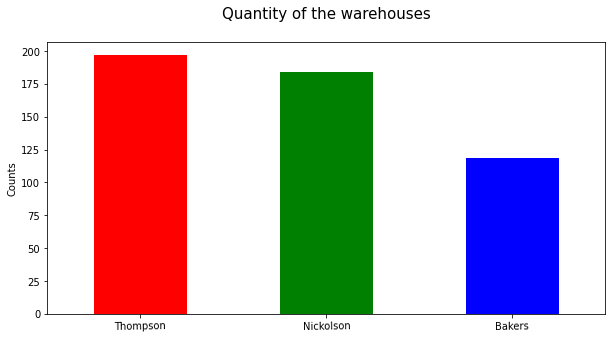

In [32]:
# Visualise the count of unique values using bar chart
warehouses.plot(kind='bar', rot=1, color=['r','g','b'], figsize=(10,5))
plt.title("Quantity of the warehouses\n", size=15)
plt.ylabel("Counts");

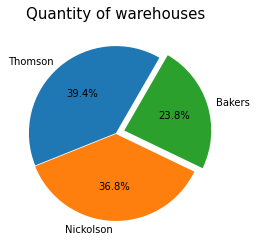

In [33]:
# Plot a pie chart to check the percentage share of warehouses
plt.pie(warehouses,
        labels=['Thomson',"Nickolson",'Bakers'],
        autopct="%0.1f%%",
        explode=[0,.01,0.1],
        startangle=60,radius=1)
plt.title("Quantity of warehouses", size=15)
plt.show()

# Analyzing order_price and order_total

order_price: Price before any discounts and delivery charges
order_total: Price after all discounts and/or delivery charges are applied

# Get the Max and Min Values

In [34]:
# Check the max valued order
dirty_data[dirty_data.order_price == dirty_data.order_price.max()]

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
335,ORD116440,ID0332546017,2019-12-31,Thompson,"[('Lucent 330S', 1), ('iAssist Line', 1), ('Ca...",947691.0,90.82,-37.809368,144.949342,10,9266.32,Summer,True,0.4187,work fine great product and no issues.,True


In [35]:
# Check the min valued order
dirty_data[dirty_data.order_price == dirty_data.order_price.min()]

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
308,ORD165713,ID2384157684,2019-11-23,Bakers,"[('iStream', 2), ('Candle Inferno', 1)]",585.0,91.79,-37.800798,145.005428,25,639.29,Spring,True,1.361,junk had this thing for less than 2 months. ha...,False



# Let's Check Calculations

In [36]:
# Check whether the order_total(after all discount and delivery charges are applied) is correct or not
dirty_data.loc[:,['order_price','delivery_charges','coupon_discount','order_total']].head(10)

,order_price,delivery_charges,coupon_discount,order_total
0,12200.0,79.89,10,11059.89
1,9080.0,62.71,0,9142.71
2,10670.0,65.87,10,9668.87
3,24800.0,57.61,15,21137.61
4,9145.0,75.54,25,6934.29
5,7810.0,71.22,10,7100.22
6,13700.0,74.84,5,13089.84
7,7960.0,52.28,5,10789.79
8,25390.0,107.58,10,22958.58
9,13320.0,62.26,15,11384.26


In [37]:
# Formula: (Order_price - ((order_price * coupon_discount)/100) + delivery_charges) = Final_Price


# First let's do it for first 10 records to correct and verify calculations

In [38]:
(10670.0 - ((10670.0 * 10)/100)+65.87)

9668.87

In [39]:
# Computing and Displaying order_total price of first 10 records
for i, index in enumerate(range(0,10)):
    if (dirty_data['coupon_discount'][i] != 0):
        dis_price = (dirty_data['order_price'][i] -((dirty_data['order_price'][i]) * (dirty_data['coupon_discount'][i])) / 100)  # apply coupon to original price
        price = dis_price + dirty_data['delivery_charges'][i]         # adding delivery charges
        final_price = np.round(price,2)

    else:
        final_price = dirty_data['order_price'][i] + dirty_data['delivery_charges'][i]   # adding order_price and delivery_charges
        final_price = np.round(final_price,2)    # round off upto 2nd decimal place

    print(f'Order total of record at index {index} is: {final_price} ')

Order total of record at index 0 is: 11059.89 
Order total of record at index 1 is: 9142.71 
Order total of record at index 2 is: 9668.87 
Order total of record at index 3 is: 21137.61 
Order total of record at index 4 is: 6934.29 
Order total of record at index 5 is: 7100.22 
Order total of record at index 6 is: 13089.84 
Order total of record at index 7 is: 7614.28 
Order total of record at index 8 is: 22958.58 
Order total of record at index 9 is: 11384.26 



# Let's correct the calculation for the entire data

In [40]:
lis = list()
for i in range(0,len(dirty_data['order_price'])):
    if (dirty_data['coupon_discount'][i] != 0):
        dis_price = (dirty_data['order_price'][i] - (dirty_data['order_price'][i]) * (dirty_data['coupon_discount'][i] / 100))   # apply coupon to original price
        price = dis_price + dirty_data['delivery_charges'][i]         # adding delivery charges
        final_price = np.round(price,2)
        lis.append(final_price)               # appending final_price to lis

    else:
        final_price = dirty_data['order_price'][i] + dirty_data['delivery_charges'][i]   # adding order_price and delivery_charges
        final_price = np.round(final_price,2)    # round off upto 2nd decimal place
        lis.append(final_price)                  # appending final_price to lis

In [41]:
print(f'Items (Price) in list is: {len(lis)}')

Items (Price) in list is: 500


In [42]:
dirty_data

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD182494,ID6197211592,2019-06-22,Thompson,"[('Lucent 330S', 1), ('Thunder line', 2), ('iS...",12200.0,79.89,-37.815105,144.932843,10,11059.89,Winter,True,1.2800,perfect phone and trusted seller. phone itself...,True
1,ORD395518,ID0282825849,2019-12-29,Thompson,"[('Thunder line', 1), ('Universe Note', 2)]",9080.0,62.71,-37.802736,144.951118,0,9142.71,Summer,False,1.1621,it keeps dropping calls the wifi don't work th...,False
2,ORD494479,ID0579391891,2019-02-03,Nickolson,"[('Thunder line', 1), ('pearTV', 2)]",10670.0,65.87,-37.821302,144.957581,10,9668.87,Autumn,False,1.0949,five stars this is a great cheap phone.,True
3,ORD019224,ID4544561904,2019-12-01,Nickolson,"[('Universe Note', 1), ('Alcon 10', 2), ('Oliv...",24800.0,57.61,-37.811416,144.973073,15,21137.61,Summer,False,0.8571,charger did not fit the charger didn't fit.,False
4,ORD104032,ID6231506320,2019-11-28,Nickolson,"[('Universe Note', 1), ('Olivia x460', 1), ('i...",9145.0,75.54,37.823859,144.969892,25,6934.29,Spring,False,0.5867,four stars good,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,ORD475510,ID0247417082,2019-07-08,Nickolson,"[('Alcon 10', 2), ('iAssist Line', 2)]",386776.0,59.70,-37.817662,144.970405,10,20174.70,Winter,True,0.1282,i bought this phone to send to my sister in .....,False
496,ORD086060,ID0130015098,2019-03-28,Nickolson,"[('pearTV', 2), ('Candle Inferno', 2), ('Toshi...",22120.0,62.29,-37.815469,144.968083,0,22182.29,Autumn,True,0.3711,one star it was the wrong phone,False
497,ORD079320,ID2707985442,2019-10-16,Nickolson,"[('pearTV', 1), ('Alcon 10', 1), ('Lucent 330S...",16490.0,106.98,-37.805979,144.966101,0,16596.98,Spring,True,1.4368,love this phone! has many great features!,True
498,ORD026546,ID0060088412,2019-05-19,Nickolson,"[('iStream', 1), ('Candle Inferno', 1), ('iAss...",5030.0,79.89,37.820071,144.984435,10,4606.89,Autumn,True,1.3191,spoiled son's birthday present son wanted one ...,True



# Outlier Check

In [43]:
dirty_data['order_total'] = pd.Series(lis)

In [44]:
Q1_order_total = dirty_data['order_total'].quantile(0.25)     # Lower Quartile
Q3_order_total = dirty_data['order_total'].quantile(0.75)     # Upper Quartile
print(f'Lower Quartile is: {Q1_order_total}')
print(f'Upper Quartile is: {Q3_order_total}')

Lower Quartile is: 6388.34
Upper Quartile is: 17926.88


In [45]:
# upper quartile - lower quartile

IQR_order_total = Q3_order_total - Q1_order_total
print(f'Value of IQR_order_total is: {IQR_order_total}')

Value of IQR_order_total is: 11538.54


In [46]:
lower_limit_order_total = Q1_order_total - 1.5 * IQR_order_total
upper_limit_order_total = Q3_order_total + 1.5 * IQR_order_total
print(f'Lower limit of order_total is: {lower_limit_order_total}')
print(f'Upper limit of order_total is: {upper_limit_order_total}')

Lower limit of order_total is: -10919.470000000001
Upper limit of order_total is: 35234.69


In [47]:
# Check the max valued order
dirty_data[dirty_data.order_total == dirty_data.order_total.max()]

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
335,ORD116440,ID0332546017,2019-12-31,Thompson,"[('Lucent 330S', 1), ('iAssist Line', 1), ('Ca...",947691.0,90.82,-37.809368,144.949342,10,853012.72,Summer,True,0.4187,work fine great product and no issues.,True


In [48]:
# Check the max valued order
dirty_data[dirty_data.order_total == dirty_data.order_total.min()]

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
308,ORD165713,ID2384157684,2019-11-23,Bakers,"[('iStream', 2), ('Candle Inferno', 1)]",585.0,91.79,-37.800798,145.005428,25,530.54,Spring,True,1.361,junk had this thing for less than 2 months. ha...,False



# Check the number of records with Outliers

In [49]:
outlier_dirty_data = dirty_data[(dirty_data['order_total'] > upper_limit_order_total) | (dirty_data['order_total'] < lower_limit_order_total)]
outlier_dirty_data

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
55,ORD442452,ID0582560124,2019-08-26,Nickolson,"[('Alcon 10', 2), ('Toshika 750', 2), ('pearTV...",43520.0,62.93,-37.822185,144.978657,5,41406.93,Winter,True,0.8949,was not described accurately phone was labeled...,False
61,ORD028755,ID0283255338,2019-06-13,Bakers,"[('iAssist Line', 2), ('pearTV', 2), ('Thunder...",37150.0,65.32,-37.803982,145.007587,0,37215.32,Winter,True,1.2762,i order google pixel 2xl and it's come google ...,False
67,ORD158007,ID3106293373,2019-02-22,Thompson,"[('iStream', 1), ('Olivia x460', 1), ('Alcon 1...",61619.0,79.39,-37.806607,144.932452,15,52455.54,Summer,False,1.4520,mom loves it i bought this for my mom and she ...,True
70,ORD122655,ID1725216621,2019-06-28,Thompson,"[('Universe Note', 2), ('Thunder line', 1), ('...",655164.0,81.70,-37.804091,144.961911,10,589729.30,Winter,True,1.6176,five stars excellent phone! i do not understan...,True
156,ORD127141,ID0777789266,2019-03-02,Thompson,"[('Lucent 330S', 2), ('pearTV', 1), ('iAssist ...",69685.0,92.70,-37.806827,144.954899,0,69777.70,Summer,True,0.9475,remarkable phone with an unbeatable price. rem...,True
237,ORD420200,ID2189162941,2019-06-12,Thompson,"[('Alcon 10', 1), ('Olivia x460', 1), ('pearTV...",865916.0,92.90,-37.811745,144.956404,15,736121.50,Summer,True,0.8274,five stars great phone,True
289,ORD339649,ID2207661056,2019-08-16,Thompson,"[('Alcon 10', 1), ('Thunder line', 2), ('Unive...",597240.0,79.91,-37.801295,144.945787,5,567457.91,Winter,True,1.2716,this was bought to replace my old candle with ...,True
299,ORD379975,ID0144730304,2019-01-13,Nickolson,"[('iAssist Line', 1), ('Alcon 10', 1)]",96385.0,77.51,-37.819260,144.957538,25,72366.26,Summer,False,1.0590,good quality great price,True
307,ORD346356,ID0312718298,2019-02-10,Thompson,"[('Candle Inferno', 1), ('Thunder line', 2), (...",63500.0,107.18,-37.803331,144.959131,25,47732.18,Spring,True,1.4855,five stars love phone,True
313,ORD496181,ID0781107765,2019-09-20,Bakers,"[('iAssist Line', 1), ('Alcon 10', 1), ('Olivi...",461736.0,87.31,-37.818497,145.015417,25,346389.31,Spring,False,2.0115,so good. have not had time to use it much so f...,True


In [50]:
print(f'Total outlier records in dirty_data is: {outlier_dirty_data.shape[0]}')

Total outlier records in dirty_data is: 18



# Remove the Outliers

In [51]:
data_without_outlier = dirty_data[(dirty_data['order_total'] > lower_limit_order_total) & (dirty_data['order_total'] < upper_limit_order_total)]
print(f'Total numbers of records without outliers is: {data_without_outlier.shape[0]}')

Total numbers of records without outliers is: 482


In [52]:
data_without_outlier.head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD182494,ID6197211592,2019-06-22,Thompson,"[('Lucent 330S', 1), ('Thunder line', 2), ('iS...",12200.0,79.89,-37.815105,144.932843,10,11059.89,Winter,True,1.2800,perfect phone and trusted seller. phone itself...,True
1,ORD395518,ID0282825849,2019-12-29,Thompson,"[('Thunder line', 1), ('Universe Note', 2)]",9080.0,62.71,-37.802736,144.951118,0,9142.71,Summer,False,1.1621,it keeps dropping calls the wifi don't work th...,False
2,ORD494479,ID0579391891,2019-02-03,Nickolson,"[('Thunder line', 1), ('pearTV', 2)]",10670.0,65.87,-37.821302,144.957581,10,9668.87,Autumn,False,1.0949,five stars this is a great cheap phone.,True
3,ORD019224,ID4544561904,2019-12-01,Nickolson,"[('Universe Note', 1), ('Alcon 10', 2), ('Oliv...",24800.0,57.61,-37.811416,144.973073,15,21137.61,Summer,False,0.8571,charger did not fit the charger didn't fit.,False
4,ORD104032,ID6231506320,2019-11-28,Nickolson,"[('Universe Note', 1), ('Olivia x460', 1), ('i...",9145.0,75.54,37.823859,144.969892,25,6934.29,Spring,False,0.5867,four stars good,True



# Find out the Happy Customers

In [53]:
data_without_outlier['is_happy_customer'].unique()
satisfaction = data_without_outlier['is_happy_customer'].value_counts()
print(satisfaction)

True     345
False    137
Name: is_happy_customer, dtype: int64


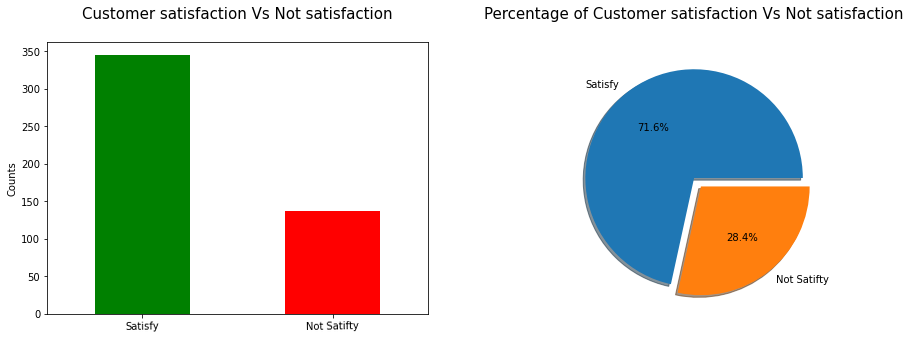

In [54]:
plt.figure(figsize=(15,5))

plt.subplot(121)
satisfaction.plot(kind='bar', color=['g','r'], rot=1)
plt.xticks(range(2), labels=['Satisfy','Not Satifty'])
plt.ylabel('Counts')
plt.title("Customer satisfaction Vs Not satisfaction\n", size=15)


plt.subplot(122)
plt.pie(satisfaction, labels=['Satisfy','Not Satifty'], autopct="%.1f%%",explode=[0,0.1],shadow=True)
plt.title("Percentage of Customer satisfaction Vs Not satisfaction\n", size=15)

plt.show()

# END